<a href="https://colab.research.google.com/github/sebasatarama/TP_AdvancedArtificialIntelligence/blob/main/TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%file yn4
20 20
16	34	17	38	0	21	6	15	15	42	8	17	7	41	18	10	10	26	11	24	1	31	19	25	14	31	13	33	4	35	9	30	3	16	12	16	5	30	2	13
5	41	11	33	6	15	16	38	0	40	14	38	3	37	1	20	13	22	4	34	7	16	17	39	9	15	2	19	10	36	12	39	18	26	8	19	15	39	19	34
17	34	1	12	16	10	7	47	13	28	15	27	0	19	6	34	19	33	12	40	9	37	14	24	8	15	10	34	2	44	3	37	18	22	11	31	4	39	5	26
5	48	7	46	16	47	10	45	14	15	8	25	0	34	3	24	12	35	18	15	2	48	13	19	11	10	1	48	17	16	15	28	4	18	6	17	9	44	19	41
12	47	3	23	9	48	16	45	14	39	6	42	8	32	15	11	13	16	5	14	11	19	1	46	19	10	10	17	7	41	2	47	17	32	4	17	0	21	18	17
18	14	16	20	1	18	12	14	13	10	6	16	5	24	4	18	0	24	11	18	15	42	19	13	3	23	14	40	9	48	8	12	2	24	10	23	7	45	17	30
0	27	12	15	4	26	13	19	17	14	5	49	7	16	18	28	16	16	8	20	9	36	2	21	14	30	3	36	1	17	15	22	6	43	11	32	10	23	19	17
0	32	16	15	17	12	7	46	3	37	18	43	11	40	13	43	9	48	4	36	15	24	8	25	1	33	14	32	5	26	6	37	12	24	10	24	2	15	19	22
10	34	6	33	15	25	8	46	0	20	18	33	4	19	13	45	2	47	1	32	3	12	11	29	16	29	5	46	12	17	7	48	14	39	17	40	19	41	9	37
13	26	3	47	5	44	6	49	1	22	17	12	10	28	19	36	9	27	4	25	14	48	7	11	16	49	12	24	11	48	2	19	0	47	18	49	8	46	15	36
13	23	18	48	14	15	0	42	3	36	8	15	6	32	10	18	1	45	15	23	11	45	2	13	17	21	12	32	7	44	5	25	19	34	16	22	9	11	4	43
17	37	7	49	15	45	2	28	9	15	8	35	12	29	13	44	1	26	4	25	5	30	3	39	0	15	14	28	18	23	6	42	11	33	16	45	10	10	19	20
0	10	6	37	3	15	13	13	10	11	2	49	1	28	14	28	15	13	8	29	12	21	16	32	11	21	4	48	5	11	17	26	9	33	18	22	7	21	19	49
18	38	0	41	4	30	13	43	6	11	2	43	14	27	3	26	9	30	15	19	16	36	1	31	17	47	5	41	10	34	8	40	12	32	7	13	11	18	19	27
6	24	5	30	7	10	10	35	8	28	16	43	19	12	9	44	15	15	3	15	2	35	18	43	0	38	4	16	1	29	17	40	14	49	13	38	12	16	11	30
3	48	6	35	13	43	2	37	17	18	5	27	9	27	7	41	1	22	15	28	16	18	10	37	18	48	4	10	8	14	11	18	14	43	0	48	12	12	19	49
0	13	13	38	7	34	6	42	1	36	5	45	18	24	8	35	14	26	19	30	12	47	16	24	11	47	4	40	10	43	3	16	15	10	2	12	9	39	17	22
16	30	13	47	19	49	8	20	4	40	3	46	17	21	14	33	6	44	7	23	9	24	0	48	10	43	15	41	2	32	5	29	11	36	1	38	12	47	18	12
13	10	5	36	12	18	16	48	0	27	14	43	10	46	6	27	7	46	19	35	11	31	2	18	8	24	3	23	17	29	18	14	9	19	1	40	15	38	4	13
9	45	16	44	0	43	17	31	14	35	13	17	12	42	3	14	18	37	10	39	6	48	7	38	15	26	4	49	2	28	11	35	1	42	5	24	8	44	19	38


Writing yn4


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
from statistics import mean, median

In [126]:
def _RandomSampleSolution(timelimit): #timelimit in seconds
  timelimit = timelimit * 1000
  with open('yn4') as f:
    n, m = [int(x) for x in f.readline().split()]
    jobs = np.zeros((n, m, 2), dtype=int)
    i = 0
    for line in f:
        jobs[i] = np.array([int(x) for x in line.split()]).reshape(m, 2)
        i += 1
  solutions = []
  solutionslengths = []
  makespans = []
  endTime = datetime.datetime.now() + datetime.timedelta(minutes=3) #el código correra durante 3 minutos hasta obtener la mejor solucion
  rep = [i for i in range(n)]*m
  random.shuffle(rep)
  while True:
    if datetime.datetime.now() >= endTime:
      break
    solution = []
    mstart = np.zeros((m), dtype=int)
    jend = np.zeros((n), dtype=int)
    idxs = np.zeros((n), dtype=int)
    contidx = 0
    makespan = 0
    for e in rep:
      i = idxs[e]
      idxs[e] += 1
      midx = jobs[e, i, 0]
      time = jobs[e, i, 1]
      mstart[midx] = max(mstart[midx], jend[e]) + time
      jend[e] = mstart[midx]
      if mstart[midx] > makespan:
        makespan = mstart[midx] #Dejremos el makespan más alto que el correcto, para ver en la visualización que solo se llega hasta el límite
      if makespan > timelimit:
        break
      contidx+=1
    solution = rep[:contidx]
    makespans.append(makespan)
    solutions.append(solution)
    solutionslengths.append(len(solution))
    random.shuffle(rep)
  return solutions, solutionslengths, makespans, n, m, jobs

In [127]:
def RandomSampleSolution(timelimit):
  solutions, solutionslengths, makespans, n, m, jobs= _RandomSampleSolution(timelimit)
  best = solutions[solutionslengths.index(max(solutionslengths))]
  bmakespan = makespans[solutionslengths.index(max(solutionslengths))]
  mstart = np.zeros((m), dtype=int)
  jend = np.zeros((n), dtype=int)
  idxs = np.zeros((n), dtype=int)
  schedule = np.zeros((m*10, bmakespan))
  for e in best:
    i = idxs[e]
    idxs[e] += 1
    midx = jobs[e, i, 0]
    time = jobs[e, i, 1]
    mstart[midx] = max(mstart[midx], jend[e])
    schedule[midx*10:(midx+1)*10, mstart[midx]:mstart[midx] + time] = e+1
    mstart[midx] += time
    jend[e] = mstart[midx]
  print(f'Best: {max(solutionslengths)}')
  print(f'Mean: {mean(solutionslengths)}')
  print(f'Med: {median(solutionslengths)}')
  print(f'Sd: {np.std(solutionslengths)}')
  plt.figure(figsize = (20, 20))
  plt.imshow(schedule)
  return solutionslengths

Best: 277
Mean: 198.0843349276801
Med: 199.0
Sd: 20.26278872155276


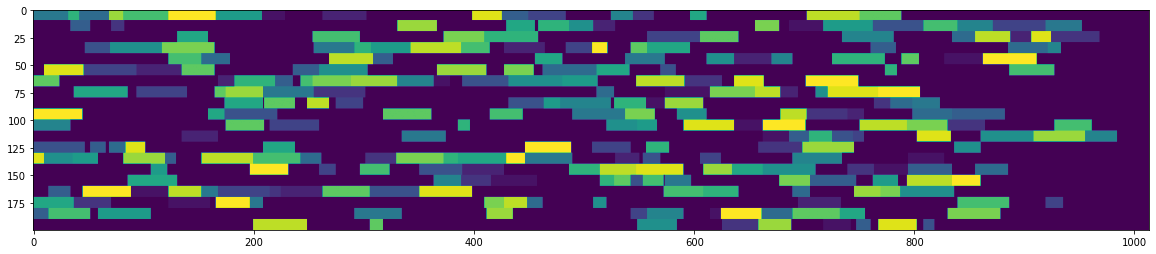

In [128]:
y = RandomSampleSolution(1)

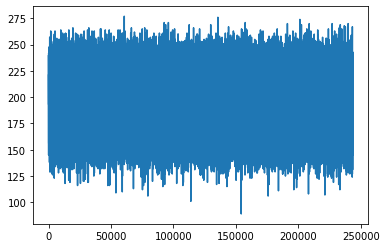

In [129]:
x = np.arange(len(y))
plt.plot(x, y)